In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Задача.** <br>
Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.<br>
Mobile Games AB Testing with Cookie Cats

**Решение:** <br>

In [7]:
df = pd.read_csv('/content/drive/MyDrive/результаты А_B - cookie_cats 2.csv')
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1
...,...,...,...,...,...
90184,9999441,gate_40,97,1,0
90185,9999479,gate_40,30,0,0
90186,9999710,gate_30,28,1,0
90187,9999768,gate_40,51,1,0


**Первичный анализ данных**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  int64 
 4   retention_7     90189 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ MB


In [9]:
df.describe()

,userid,sum_gamerounds,retention_1,retention_7
count,9.018900e+04,90189.000000,90189.000000,90189.000000
mean,4.998412e+06,51.872457,0.445210,0.186065
std,2.883286e+06,195.050858,0.496992,0.389161
min,1.160000e+02,0.000000,0.000000,0.000000
25%,2.512230e+06,5.000000,0.000000,0.000000
50%,4.995815e+06,16.000000,0.000000,0.000000
75%,7.496452e+06,51.000000,1.000000,0.000000
max,9.999861e+06,49854.000000,1.000000,1.000000


In [13]:
df.userid.nunique() # количество уникальных значений

90189

In [15]:
df.groupby('version')[['userid']].nunique() # проверим разбивку игроков по группам при проведение a/b тестирования

,userid
version,
gate_30,44700
gate_40,45489


**Вывод:** Как видно количество игроков разбито примерно поровну 44700 к 45489

Подсчитаем количество игроков для каждого количества игровых раундов

In [23]:
plot_df = df.groupby("sum_gamerounds")["userid"].count()
plot_df

sum_gamerounds
0        3994
1        5538
2        4606
3        3958
4        3629
         ... 
2294        1
2438        1
2640        1
2961        1
49854       1
Name: userid, Length: 942, dtype: int64

Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов

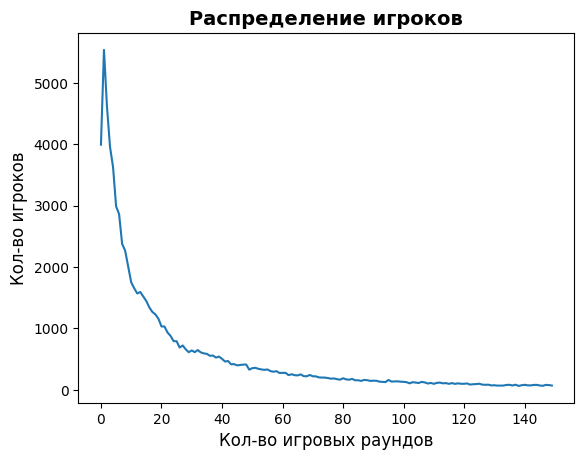

In [17]:
ax = plot_df.head(150).plot()
plt.title("Распределение игроков", fontweight="bold", size=14)
plt.xlabel("Кол-во игровых раундов", size=12)
plt.ylabel("Кол-во игроков", size=12)
plt.show()

In [18]:
df.query("sum_gamerounds == 0").userid.count() # количество игроков, которые не сыграли ни одного раунда, а только установили игру

3994

In [19]:
df_retention = df[["retention_1","retention_7"]].mean()*100
print(f"коэффициент удержания на 1 день: {round(df_retention[0],2)}% \
      \nкоэффициент удержания за 7 день {round(df_retention[1],2)}%")

коэффициент удержания на 1 день: 44.52%       
коэффициент удержания за 7 день 18.61%


**Вывод:** Как видно 44,52 % игроков возвращаются через день после установки игры и 18,61 % игроков возвращаются через 7 дней после установки игры.

Посмотрим разницу между группами, для тех кто возвращается через 1 день и через 7 дней

In [27]:
df.groupby('version')[['retention_1','retention_7']].mean()*100

,retention_1,retention_7
version,,
gate_30,44.818792,19.020134
gate_40,44.228275,18.200004


**Вывод:** Как видно, происходит небольшое снижение на gate_40, чем на gate_30 после 1-ого дня. Также есть небольшое снижение и после 7 дня. Таким образом, показатели у gate_40 ниже, чем у gate_30.

На графике отобразим разницу между группами gate_30 и gate_40, для тех кто возвращается через 1 день после установки и для тех кто возвращается через 7 дней после установки

In [29]:
boot_1d = []
boot_7d = []
for i in range(1000):
    boot_mean_1 = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)

boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

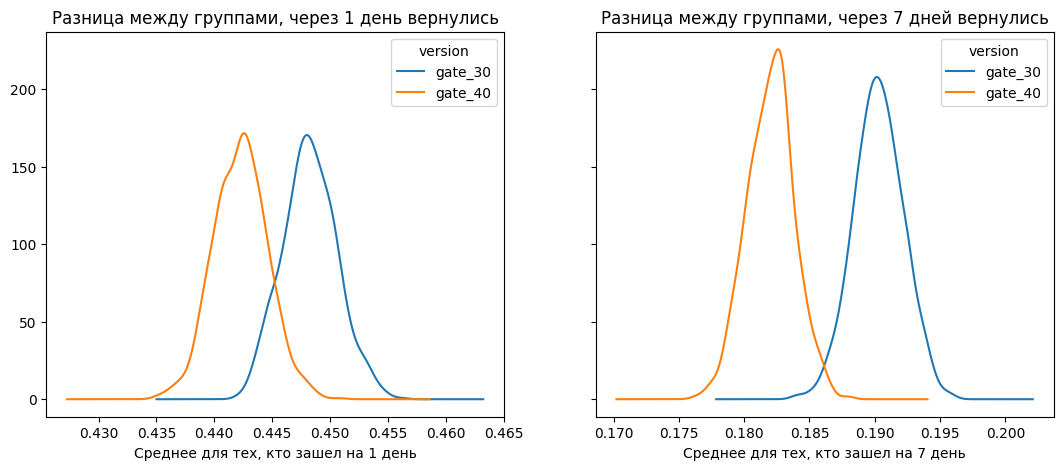

In [33]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))

boot_1d.plot.kde(ax=ax1)
ax1.set_title('Разница между группами, через 1 день вернулись')
ax1.set_xlabel('Среднее для тех, кто зашел на 1 день');
ax1.set_ylabel("",size=12)

boot_7d.plot.kde(ax=ax2)
ax2.set_title('Разница между группами, через 7 дней вернулись')
ax2.set_xlabel('Среднее для тех, кто зашел на 7 день');

**Вывод:** По графикам также видно, что происходит небольшое снижение на gate_40, чем на gate_30 после одного дня. Также есть небольшое снижение и после 7 дня.Таким образом, показатели у gate_40 ниже, чем у gate_30.

Найдем разницы между группами

In [34]:
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)

На графике отобразим разницу между группами gate_30 и gate_40, для тех кто возвращается через 1 день после установки и для тех кто возвращается через 7 дней после установки в %.

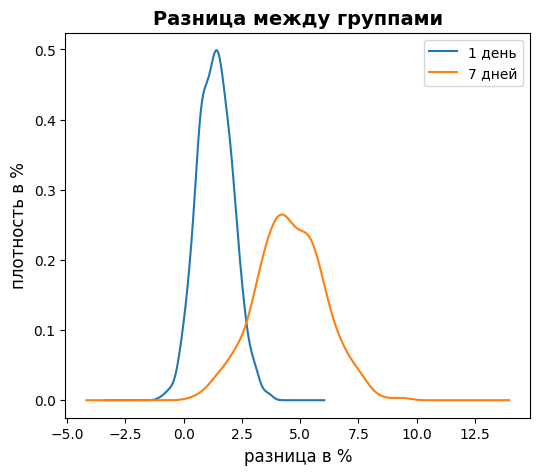

In [35]:
fig, (ax1) = plt.subplots(1, 1,figsize=(6,5))

boot_1d['diff'].plot.kde(ax=ax1, label = "1 день")
boot_7d['diff'].plot.kde(ax=ax1, label = "7 дней")
ax1.set_xlabel("разница в %",size=12)
ax1.set_ylabel("плотность в %",size=12)
ax1.set_title("Разница между группами", fontweight="bold", size=14)
plt.legend()
plt.show()

**Вывод:** Из этого графика видно, что наиболее вероятная разница составляет около 1% - 2% для 1 дня. Для 7 дней наиболее вероятная разница составляет около 2% - 5%. Причем большая часть распределения выше 0%, в пользу gate_30.

**Итог:** Как видно, что при gate_30 удержание игрока выше как 1-дневное, так и 7-дневное, чем у gate_40. Таким образом, можно сделать вывод, что не нужно изменять размещение ворот с уровня 30 на уровень 40, это только уменьшает удержание игроков.
